In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


C:\Users\ashwi\anaconda3\envs\my_clone_env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ashwi\anaconda3\envs\my_clone_env\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\ashwi\anaconda3\envs\my_clone_env\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Specify the path to the folder containing your images
image_folder_path = "Train"

# List all image files in the folder
image_files = os.listdir(image_folder_path)

# Define the categories based on unique prefixes of image filenames
image_categories = set()

for file in image_files:
    if file.lower().startswith("covid"):
        image_categories.add("COVID")
    elif file.lower().startswith("non_covid"):
        image_categories.add("Non_COVID")
    elif file.lower().startswith("normal"):
        image_categories.add("Normal")

In [3]:
image_categories

{'COVID', 'Non_COVID', 'Normal'}

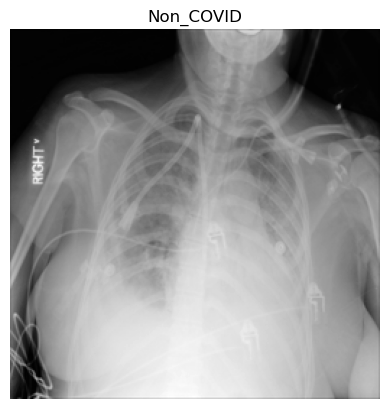

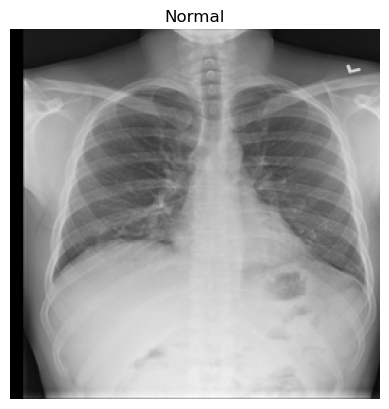

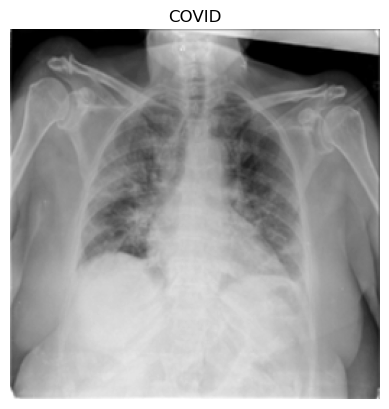

In [5]:
for category in image_categories:
    # Filter image files for the current category
    category_images = [file for file in image_files if file.lower().startswith(category.lower())]
    
    # Select the first image from the category
    first_image = category_images[0]
    image_path = os.path.join(image_folder_path, first_image)
    
    # Load and display the selected image
    img = mpimg.imread(image_path)
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Turn off axis
    plt.title(category)  # Display category name as title
    plt.show()

In [8]:
# Specify the path to the folder containing your images
mask_folder_path = "Train_Masks"

# List all image files in the folder
imageMask_files = os.listdir(mask_folder_path)

# Define the categories based on unique prefixes of image filenames
mask_categories = set()

for file in imageMask_files:
    if file.lower().startswith("covid"):
        mask_categories.add("COVID")
    elif file.lower().startswith("non_covid"):
        mask_categories.add("Non_COVID")
    elif file.lower().startswith("normal"):
        mask_categories.add("Normal")

In [9]:
mask_categories

{'COVID', 'Non_COVID', 'Normal'}

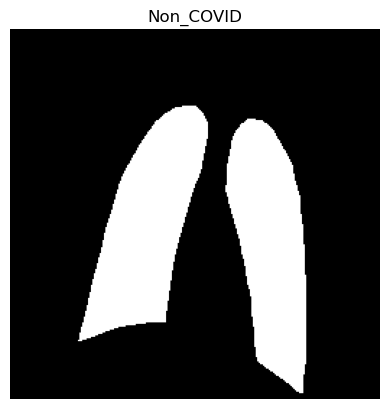

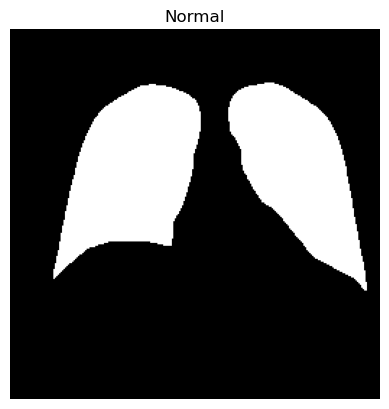

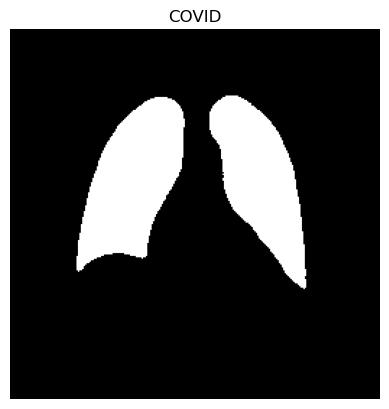

In [10]:
for category in mask_categories:
    # Filter image files for the current category
    category_images = [file for file in imageMask_files if file.lower().startswith(category.lower())]
    
    # Select the first image from the category
    first_image = category_images[0]
    image_path = os.path.join(mask_folder_path, first_image)
    
    # Load and display the selected image
    img = mpimg.imread(image_path)
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Turn off axis
    plt.title(category)  # Display category name as title
    plt.show()

In [12]:
images = []
masks = []

In [13]:
import numpy as np
from PIL import Image
# Iterate over each image file
for image_file in image_files:
    # Get the path to the image file
    image_path = os.path.join(image_folder_path, image_file)
    
    # Load the image using PIL
    image = Image.open(image_path)
    
    # Convert the image to a NumPy array and normalize pixel values
    image_array = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    
    # Add the preprocessed image to the list of images
    images.append(image_array)

In [14]:
for mask_file in imageMask_files:
    # Get the path to the image file
    mask_path = os.path.join(mask_folder_path, mask_file)
    
    # Load the image using PIL
    mask = Image.open(mask_path)

    # Convert the image to a NumPy array and normalize pixel values
    mask_array = np.array(mask) / 255.0  # Normalize pixel values to [0, 1]
    
    # Add the preprocessed image to the list of images
    masks.append(mask_array)

In [15]:
from sklearn.model_selection import train_test_split
img_train, img_test, mask_train, mask_test = train_test_split(images, masks, test_size = 0.2, random_state= 42)

In [16]:
img_train = np.array(img_train)
img_test = np.array(img_test)
mask_train = np.array(mask_train)
mask_test = np.array(mask_test)

In [17]:
print(img_train.shape)
print(img_test.shape)
print(mask_train.shape)
print(mask_test.shape)

(1200, 256, 256)
(300, 256, 256)
(1200, 256, 256)
(300, 256, 256)


In [18]:
import keras
import tensorflow as tf
import numpy as np

print("Keras version:", keras.__version__)
print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)

Keras version: 2.13.1
TensorFlow version: 2.13.0
NumPy version: 1.22.0


In [19]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.activations import *
import keras.backend as K
from keras.layers import Flatten

In [20]:
def dice_coef(y_true, y_pred):
    y_true_f = Flatten()(y_true)
    y_pred_f = Flatten()(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

def unet(input_size=(256,256,1)):
    inputs = Input(input_size)
    
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
   
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return Model(inputs=[inputs], outputs=[conv10])

In [21]:
from tensorflow.keras.optimizers import Adam
EPOCHS = 10
model = unet(input_size=(256,256,1))
model.compile(optimizer=Adam(learning_rate=5*1e-4), loss="binary_crossentropy", \
                  metrics=[dice_coef, 'binary_accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 32)         320       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 32)         9248      ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)         0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [22]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('cxr_reg')

checkpoint = ModelCheckpoint(weight_path, monitor='loss', #verbose=1, 
                             save_best_only=True, #mode='min', 
                             save_weights_only = True)


early = EarlyStopping(monitor="loss", 
                      #mode="min", 
                      patience=10) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early]

In [23]:

history = model.fit(x = img_train, 
                    y = mask_train, 
                    validation_data = (img_test, mask_test), 
                    epochs = 10, 
                    batch_size = 16,
                   callbacks = callbacks_list)
#model.save('my_model.h5')

Epoch 1/10
75/75 [==============================] - 687s 9s/step - loss: 0.4959 - dice_coef: 0.3256 - binary_accuracy: 0.7713 - val_loss: 0.3876 - val_dice_coef: 0.4244 - val_binary_accuracy: 0.8065
Epoch 2/10
75/75 [==============================] - 675s 9s/step - loss: 0.2350 - dice_coef: 0.7026 - binary_accuracy: 0.9082 - val_loss: 0.1674 - val_dice_coef: 0.7993 - val_binary_accuracy: 0.9351
Epoch 3/10
75/75 [==============================] - 673s 9s/step - loss: 0.1464 - dice_coef: 0.8220 - binary_accuracy: 0.9432 - val_loss: 0.1224 - val_dice_coef: 0.8547 - val_binary_accuracy: 0.9521
Epoch 4/10
75/75 [==============================] - 679s 9s/step - loss: 0.1129 - dice_coef: 0.8637 - binary_accuracy: 0.9566 - val_loss: 0.1105 - val_dice_coef: 0.8779 - val_binary_accuracy: 0.9576
Epoch 5/10
75/75 [==============================] - 706s 9s/step - loss: 0.0975 - dice_coef: 0.8826 - binary_accuracy: 0.9622 - val_loss: 0.0966 - val_dice_coef: 0.8901 - val_binary_accuracy: 0.9632
Epoch

C:\Users\ashwi\anaconda3\envs\my_clone_env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
# Specify the path to the folder containing your images
predict_folder_path = "Predict"

# List all image files in the folder
predict_files = os.listdir(predict_folder_path)

predicts = []

for predict_file in predict_files:
    # Get the path to the image file
    predict_path = os.path.join(predict_folder_path, predict_file)
    
    # Load the image using PIL
    predict = Image.open(predict_path)
    
    # Preprocess the image as necessary (e.g., resize, normalize)
    # For example, you can resize the image to a fixed size (e.g., 256x256)
    #image = image.resize((256, 256))
    
    # Convert the image to a NumPy array and normalize pixel values
    predict_array = np.array(predict) / 255.0  # Normalize pixel values to [0, 1]
    
    # Add the preprocessed image to the list of images
    predicts.append(predict_array)
    
predicts = np.array(predicts)
print(predicts.shape)

(15, 256, 256)


In [25]:
# Specify the path to the folder containing your images
predictMask_folder_path = "Predict_Masks"

# List all image files in the folder
predictMask_files = os.listdir(predictMask_folder_path)

predictMasks = []

for predictMask_file in predictMask_files:
    # Get the path to the image file
    predictMask_path = os.path.join(predictMask_folder_path, predictMask_file)
    
    # Load the image using PIL
    predictMask = Image.open(predictMask_path)
    
    # Preprocess the image as necessary (e.g., resize, normalize)
    # For example, you can resize the image to a fixed size (e.g., 256x256)
    #image = image.resize((256, 256))
    
    # Convert the image to a NumPy array and normalize pixel values
    predictMask_array = np.array(predictMask) / 255.0  # Normalize pixel values to [0, 1]
    
    # Add the preprocessed image to the list of images
    predictMasks.append(predictMask_array)
    
predictMasks = np.array(predictMasks)
print(predictMasks.shape)

(15, 256, 256)


In [26]:
def dice_coef_test(y_true, y_pred):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    union = np.sum(y_true_f) + np.sum(y_pred_f)
    if union==0: return 1
    intersection = np.sum(y_true_f * y_pred_f)
    return 2. * intersection / union

1/1 [==============================] - 0s 183ms/step
Dice Coefficient : 0.9519432901491078


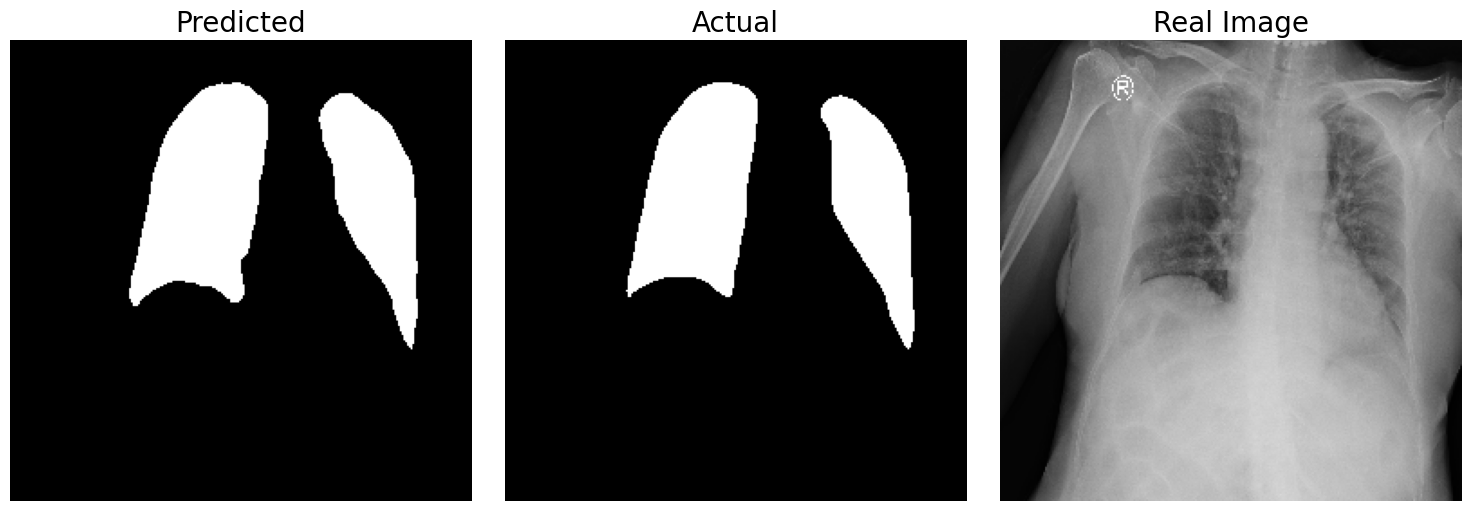

In [40]:
img_num = 14 #(0-14)

pred = model.predict(predicts[img_num].reshape(1,256, 256,1))
pred[pred>0.5] = 1.0
pred[pred<0.5] = 0.0

print("Dice Coefficient : ", end="")
print(dice_coef_test(y_true=predictMasks[img_num], y_pred=pred))

fig = plt.figure(figsize=(15, 5))

# Plot Predicted Image
plt.subplot(1, 3, 1)
plt.imshow(pred.reshape(256, 256), cmap='gray', extent=[0, 255, 255, 0])
plt.title("Predicted", fontsize=20)
plt.axis("off")

# Plot Actual Image
actual = predictMasks[img_num]
plt.subplot(1, 3, 2)
plt.imshow(actual.reshape(256, 256), cmap='gray', extent=[0, 255, 255, 0])
plt.title("Actual", fontsize=20)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(predicts[img_num], cmap='gray')
plt.title("Real Image", fontsize=20)
plt.axis("off")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



In [29]:
print(history.history.keys())

dict_keys(['loss', 'dice_coef', 'binary_accuracy', 'val_loss', 'val_dice_coef', 'val_binary_accuracy'])


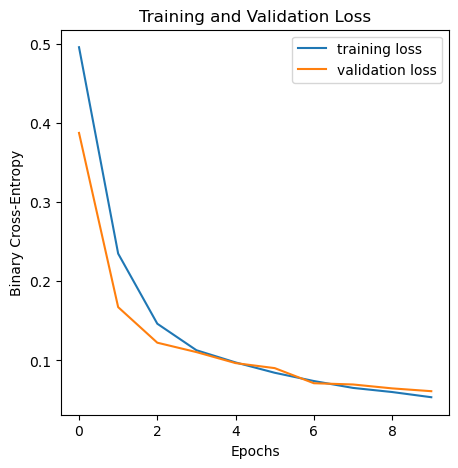

In [30]:
# Plot training and validation loss
fig1 = plt.figure(figsize=(5, 5))
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy")
plt.title("Training and Validation Loss")
plt.show()

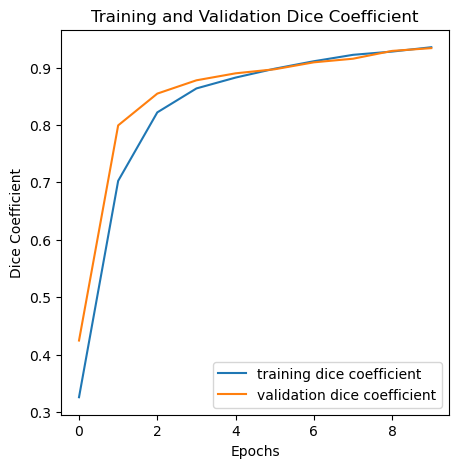

In [31]:
# Plot training and validation dice coefficient
fig2 = plt.figure(figsize=(5, 5))
plt.plot(history.history["dice_coef"], label="training dice coefficient")
plt.plot(history.history["val_dice_coef"], label="validation dice coefficient")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Dice Coefficient")
plt.title("Training and Validation Dice Coefficient")
plt.show()